Import libraries

In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the file

In [2]:
path = 'data/gps230120g002.hdf5'

file = h5py.File(path, 'r')

dataset = file['Data'].get('Table Layout') # type: ignore
data_array = np.array(dataset)


dataset1 = file['Data']['Array Layout']['2D Parameters']['tec'] # type: ignore
tec_array = np.array(dataset1)

file.close()

In [12]:
def get_all(name):
   print(name)

with h5py.File(path, 'r') as f:
   #f.visit(get_all)

   print(f['Metadata']['Data Parameters'][()]) # type: ignore

[(b'YEAR', b'Year (universal time)', 0, b'y', b'Madrigal Hdf5 Prolog Parameters')
 (b'MONTH', b'Month (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'DAY', b'Day (universal time)', 0, b'd', b'Madrigal Hdf5 Prolog Parameters')
 (b'HOUR', b'Hour (universal time)', 0, b'h', b'Madrigal Hdf5 Prolog Parameters')
 (b'MIN', b'Minute (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'SEC', b'Second (universal time)', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'RECNO', b'Logical Record Number', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINDAT', b'Kind of data', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINST', b'Instrument Code', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT1_UNIX', b'Unix seconds (1/1/1970) at start', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT2_UNIX', b'Unix seconds (1/1/1970) at end', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'GDLAT', b'Geodetic latitude of measurement', 0, b'deg', b'Geographic 

Form a pandas dataframe

In [4]:
df = pd.DataFrame(data_array)
df['minute'] = df['min']
df['second'] = df['sec']
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df = df.drop(['recno','kindat','kinst','ut1_unix','ut2_unix', 'year', 'month', 'day', 'hour', 'minute', 'second', 'min', 'sec'], axis=1)
print(df.head())

LAT = 66
LONG = 20

   gdlat   glon        tec      dtec            datetime
0  -90.0 -175.0  18.468218  1.841612 2023-01-20 00:02:30
1  -90.0 -167.0  18.409216  1.846627 2023-01-20 00:02:30
2  -90.0 -160.0  18.416958  1.851738 2023-01-20 00:02:30
3  -90.0 -153.0  18.367249  1.856943 2023-01-20 00:02:30
4  -90.0 -147.0  18.273855  1.862242 2023-01-20 00:02:30


In [5]:
df1= df.loc[(df['gdlat'] == LAT) & (df['glon'] == LONG)]

Read the rest of the files

In [6]:
path = 'data/gps230121g002.hdf5'

file = h5py.File(path, 'r')

dataset = file['Data'].get('Table Layout') # type: ignore
data_array = np.array(dataset)

file.close()

df2 = pd.DataFrame(data_array)
df2['minute'] = df2['min']
df2['second'] = df2['sec']
df2['datetime'] = pd.to_datetime(df2[['year', 'month', 'day', 'hour', 'minute', 'second']])
df2 = df2.drop(['recno','kindat','kinst','ut1_unix','ut2_unix', 'year', 'month', 'day', 'hour', 'minute', 'second', 'min', 'sec'], axis=1)
df2 = df2.loc[(df2['gdlat'] == LAT) & (df2['glon'] == LONG)]

In [7]:
path = 'data/gps230122g002.hdf5'

file = h5py.File(path, 'r')

dataset = file['Data'].get('Table Layout') # type: ignore
data_array = np.array(dataset)

file.close()

df3 = pd.DataFrame(data_array)
df3['minute'] = df3['min']
df3['second'] = df3['sec']
df3['datetime'] = pd.to_datetime(df3[['year', 'month', 'day', 'hour', 'minute', 'second']])
df3 = df3.drop(['recno','kindat','kinst','ut1_unix','ut2_unix', 'year', 'month', 'day', 'hour', 'minute', 'second', 'min', 'sec'], axis=1)
df3 = df3.loc[(df3['gdlat'] == LAT) & (df3['glon'] == LONG)]

Join the dataframes

In [8]:
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

Plot the plot


In [9]:
df5 = df.set_index('datetime')
moving_avg = df5['tec'].rolling(window=18, min_periods=1, center=True).mean()

# Subtract the moving average from the original values
df5['detrended_tec'] = df5['tec'] - moving_avg
df5

,gdlat,glon,tec,dtec,detrended_tec
datetime,,,,,
2023-01-20 00:02:30,66.0,20.0,4.027731,0.285016,-0.597479
2023-01-20 00:07:30,66.0,20.0,4.687157,0.277838,0.039943
2023-01-20 00:12:30,66.0,20.0,4.542759,0.271663,-0.131199
2023-01-20 00:17:30,66.0,20.0,4.863479,0.260531,0.172571
2023-01-20 00:22:30,66.0,20.0,4.748810,0.237807,0.051538
...,...,...,...,...,...
2023-01-22 23:37:30,66.0,20.0,8.965214,0.336522,0.410003
2023-01-22 23:42:30,66.0,20.0,8.770864,0.255854,0.246763
2023-01-22 23:47:30,66.0,20.0,8.591024,0.298692,0.041165


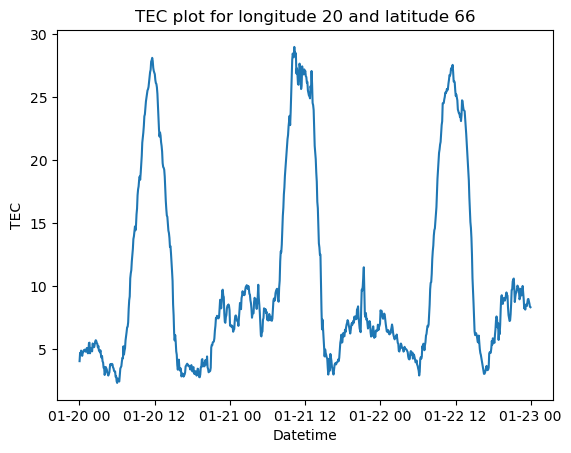

In [10]:
plt.plot(df['datetime'], df['tec'])
#plt.plot(df5.index, moving_avg)
plt.xlabel('Datetime')
plt.ylabel('TEC')
plt.title(f'TEC plot for longitude {LONG} and latitude {LAT}')
plt.show()

Rolling average

Smoothed plot

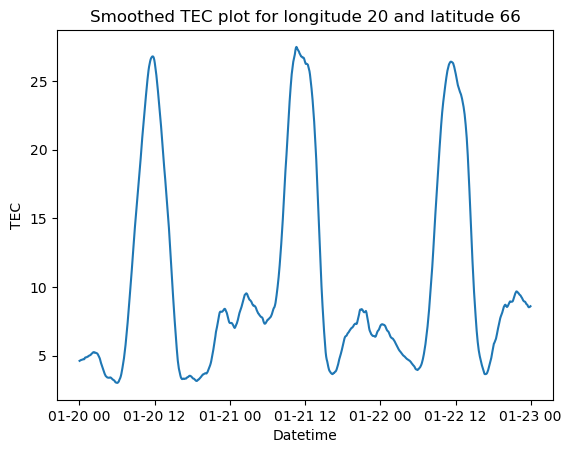

In [11]:
plt.plot(df5.index, moving_avg)
plt.xlabel('Datetime')
plt.ylabel('TEC')
plt.title(f'Smoothed TEC plot for longitude {LONG} and latitude {LAT}')
plt.show()